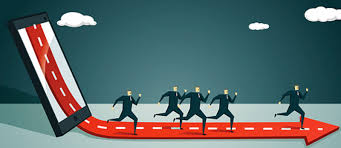

# Predicting Customer Churn

## Objective: 
To train the model using existing datasets and predicting the likelihood that a customer will churn.


Customer churn prediction refers to detecting which customers are likely to leave a service or terminate their subscription to a service. It is very critical for businesses because gaining new clients often costs more than retaining the existing ones.

Customer churn is a common problem that exists across businesses in many industries. Investing in acquiring new clients is a non-negotiable investment for any company. When a client leaves, it represents a significant loss for the business. A lot of resources needs to be channelled into replacing them.

Some of the reasons why customers are lost include:
- Incorrect pricing
- Unimpressive renewal offers.
- Lack of market understanding.
- poor customer service
- Overcommunication and spamming.
- Lack of brand loyalty.

The ability to predict when a client is likely to leave and offering them enticing incentives that will make them stay, can offer huge savings to a business. Business managers have to understand the factors that keep customers engaged and this is a strategy that requires constant development. It is important to note that finding patterns using Exploratory Data Analysis (EDA) is as important as the final prediction itself. A Churn prediction task remains unfinished if the data patterns are not found in EDA.

This churn prediction modelling technique attempts to explore some customer behaviours and attributes that relates to the reason 
and time of customers leaving.

I have used the Telco Customer Churn dataset which is available on Kaggle. You can find the dataset <a href="https://www.kaggle.com/blastchar/telco-customer-churn">here</a>


## Importing the required libraries to be used

In [1]:
%%HTML 
<style type="text/css">
table.dataframe td, table.dataframe th {
     border: 1px black solid !important;
    color: black !important;}
</style>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [20]:
data = pd.read_csv('Customer_Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are a total of 20 columns in our data set. Out of these, only 3 are of numeric data type.



## Data Exploration and Visualization
We need to explore the data to find some statistics, trends and patterns from the data.

For the columns in the dataset which are non-numerical, we can visualize them by ploting a graph
against the Churn column.

In [22]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [23]:
data.shape

(7043, 21)

<AxesSubplot:xlabel='Churn', ylabel='count'>

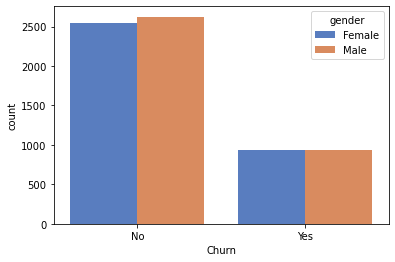

In [24]:
sns.countplot(x='Churn',data=data,hue='gender',palette="muted")

From the graph above, we can see that gender is not a contributing factor for customer churn as the number of both the genders, that have or haven’t churned are almost the same.


<AxesSubplot:xlabel='Churn', ylabel='count'>

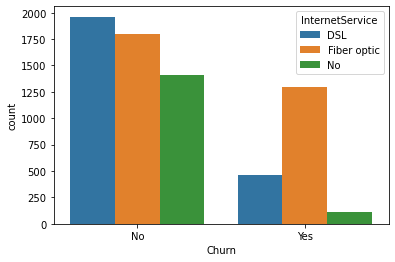

In [25]:
sns.countplot(x='Churn',data=data, hue='InternetService')

We can see from the chart above that customers using Fiber-optic services have a higher churn percentage. This gives an indication that the
company needs to improve on their Fiber-optic service.


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

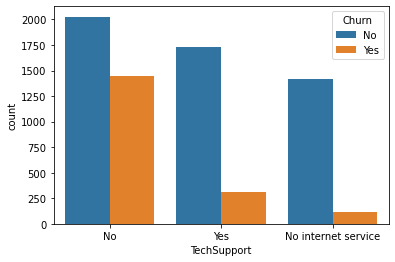

In [26]:
sns.countplot(x='TechSupport',data=data, hue='Churn',palette='tab10')

Customers withou tech support have churned more, which is clearly obvious. This doesn't mean that the company's tech support service is poor as it can be seen that a lot of customers who stayed had enough tech support. 

### Let's look at some of the numerical values.

[Text(0.5, 0, 'Tenure in Months'), Text(0, 0.5, 'Count')]

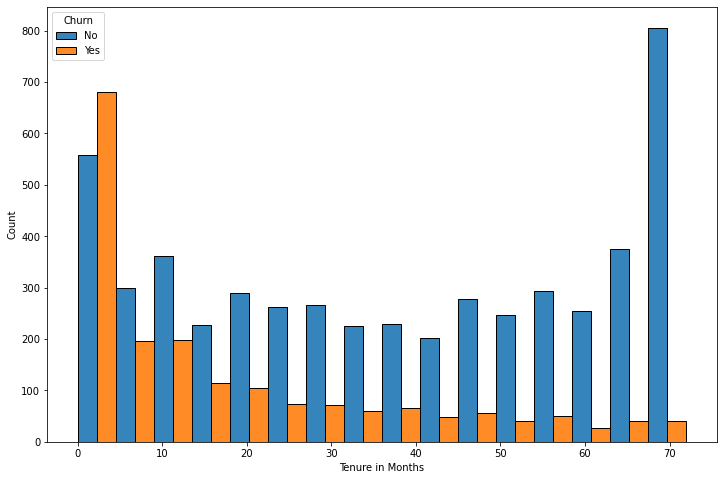

In [27]:
fig = plt.figure(figsize = (12,8))
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = data, multiple='dodge', alpha=0.9) 
ax.set(xlabel="Tenure in Months",ylabel = "Count")

The churn amount is higher for those in their first 5 months, which is usually the
time when the new customers try out the service and probably decide whether to
continue or cancel. This pretty much can be attributed to their dissatisfaction and uncertainty.


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

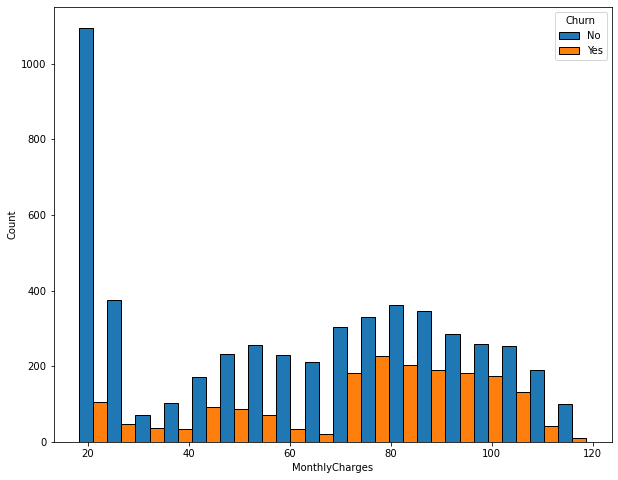

In [28]:
fig = plt.figure(figsize = (10,8))
sns.histplot(x='MonthlyCharges',hue='Churn',data=data,multiple='dodge', alpha=1)

We cannot see a definite pattern in this, but we can conclude that those who have monthly charges as high
as 100 dollars have chosen not to churn. This indicates that the company has done well to retain high
paying customers.
Similarly, we can evaluate the other parameters as well and draw meaningful conclusions as to how the
company should improve customer retention.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

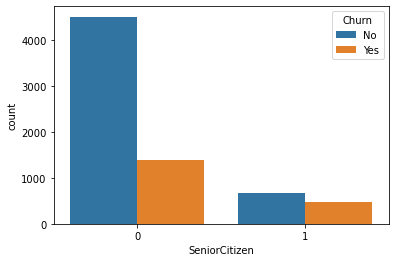

In [29]:
sns.countplot(x='SeniorCitizen',data=data, hue='Churn',palette='tab10')

We can see that most of the senior citizens never bothered to leave the network service possibly because they're getting enough benefits and service for their money.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

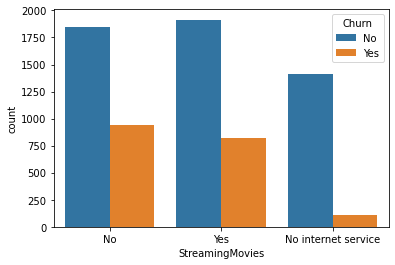

In [30]:
sns.countplot(x='StreamingMovies',data=data, hue='Churn')

### We'll change the Categorical values of the label into numerical. i.e 1 for Yes and 0 for No.

In [31]:
data.Churn = data.Churn.map(dict(Yes=1, No=0))

<AxesSubplot:>

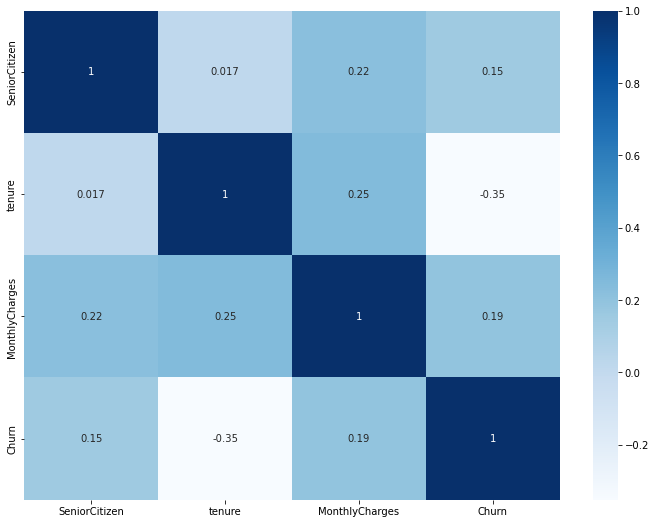

In [32]:
cor=data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cor,annot=True,cmap="Blues")

In [33]:
cor['Churn'].sort_values(ascending=False)

Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
tenure           -0.352229
Name: Churn, dtype: float64

On those who stream movies, there are more customers who stayed than those that left. Further data exploration can be carried out on the data that can help the company improve their customer retention.

## Data Preparation

#### Checking for null values.

In [34]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Our dataset does not contain any null values.

-----------------------------------------------------------------
We need to make sure that the data is in the right format to be used for prediction. Machine Learning models
do not work well non-numerical inputs. So, we will convert the categorical variables in our data set to
numerical values by using one-hot encoding.

We will also copy our data to avoid changing our original data.

In [35]:
data_copy = data.copy(deep=True)
data_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [36]:
#data.Churn = data.Churn.map(dict(Yes=1, No=0))

In [37]:
y = data_copy['Churn']
X = data_copy.drop(['Churn','customerID'], axis=1)

In [38]:
X = pd.get_dummies(X,drop_first=True) 

## Scaling
Scaling data is important as it reduces the gap between the numbers and increase prediction accuracy.

Normalization (also known as Min-max scaling) is the simplest: values are shifted
and rescaled so that they end up ranging from 0 to 1.

In [39]:
from sklearn.preprocessing import MinMaxScaler 
features = X.columns.values 
scaler = MinMaxScaler(feature_range = (0,1)) 
scaler.fit(X) 
X = pd.DataFrame(scaler.transform(X)) 

X.head()

,0,1,2,3,4,5,6,7,8,9,...,6549,6550,6551,6552,6553,6554,6555,6556,6557,6558
0,0.0,0.013889,0.115423,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.472222,0.385075,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.027778,0.354229,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.625000,0.239303,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Predictions

Now that the data has been transformed to a form that the machine learning algorithms can understand.
Let's make predictions. We will be using 3 different algorithms namely:

- Logistic Regression
- Random Forest 
- XG Boost.


The dataset will be split into two sets; for training and testing.

In [40]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=41)


### 1) Logistic Regression

In [41]:

from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression() 
logreg.fit(X_train,y_train)
prediction_logreg = logreg.predict(X_test) 
print(accuracy_score(y_test,prediction_logreg))

0.792238523426408


## 2) Random Forest using Random searchCV

In [42]:
from sklearn.ensemble import RandomForestClassifier 
rf_c=RandomForestClassifier()

param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)], 'max_features':
    ['auto','sqrt'], 'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)], 'min_samples_leaf':
    [1,2,3,5], 'min_samples_split':[2,5,10,15]}

In [43]:
random_cv = RandomizedSearchCV(rf_c,param_grid, cv=3,  verbose=2,random_state=42) 

random_cv.fit(X_train,y_train)

best_random = random_cv.best_estimator_ 

prediction_cv=best_random.predict(X_test)

print(accuracy_score(y_test,prediction_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 1.5min
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 1.5min
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 1.5min
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   3.4s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   3.3s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.4s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

## 3) XGBoost


In [44]:
from xgboost import XGBClassifier 
xgb = XGBClassifier() 

xgb.fit(X_train, y_train) 


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [45]:
xgb_prediction = xgb.predict(X_test) 
print(accuracy_score(y_test, xgb_prediction))

0.7785139611926172


In [48]:
print("Logistic Regression: \n",confusion_matrix(y_test,prediction_logreg))
print(" \n")
print("Random Forest: \n",confusion_matrix(y_test,prediction_cv))
print(" \n")
print("XG Boost: \n" ,confusion_matrix(y_test,xgb_prediction))

Logistic Regression: 
 [[1380  174]
 [ 265  294]]
 

Random Forest: 
 [[1406  148]
 [ 295  264]]
 

XG Boost: 
 [[1355  199]
 [ 269  290]]


This matrix shows that our model needs to be improved, especially in the False Negative classifications.